#  MNIST

* 2개의 히든 레이어를 도입한다.
* input layer는 28*28개의 노드
* hidden layer의 노드의 수는 자유롭게 설정해도 좋다.
* output은 10개(0~9)로 설정한다.

#### test data를 예측하여 정확도를 최대가 되도록 학습하여라.
* 제출 시 test data의 정확도를 출력하여 제출하세요.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [3]:
loader = torch.utils.data.DataLoader(
    dataset = train_data,
    batch_size = 100
)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.size()

torch.Size([60000, 28, 28])

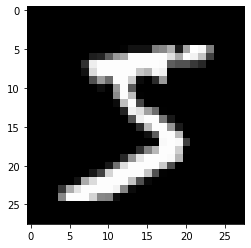

In [7]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')

In [8]:
# Flatten input data
X=torch.flatten(train_data.data,start_dim=1).float()
y=train_data.targets
X_test=torch.flatten(test_data.data,start_dim=1).float()
y_test=test_data.targets
X=X/255 # 데이터를 0~1로 정규화
X_test=X_test/255

In [9]:
din, dh1, dh2, dout = 28*28, 482, 241, 10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # hidden1 - hidden2
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden2 - out
    torch.nn.Softmax(dim=1)
)

# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [10]:
# learning
nums_epoch = 200
def train(model, criterion, optimizer, nums_epoch, X, y, X_test, y_test):
    for epoch in range(nums_epoch):
        y_pred = model(X)
        loss = criterion(y_pred,y)
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases
        
        if(epoch%10==0):
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy_train = corrects.sum().float() / float( y.size(0) )
            print(epoch, "loss_train=", loss.item(), "accu_train=", accuracy_train.item())

            y_test_pred = model(X_test) # train data를 기반으로 한 model을 test data를 통해 검증
            test_prediction = y_test_pred.max(1)[1] # max indices
            test_corrects = (test_prediction == y_test)
            accuracy_test = test_corrects.sum().float() / float( y_test.size(0) )
            print(epoch, "loss_test=", loss.item(), "accu_test=", accuracy_test.item())

In [11]:
train(model,criterion, optimizer, nums_epoch, X, y, X_test, y_test);

0 loss_train= 2.303154706954956 accu_train= 0.09011666476726532
0 loss_test= 2.303154706954956 accu_test= 0.2770000100135803
10 loss_train= 2.0395114421844482 accu_train= 0.539566695690155
10 loss_test= 2.0395114421844482 accu_test= 0.5698999762535095
20 loss_train= 1.7643256187438965 accu_train= 0.7256166934967041
20 loss_test= 1.7643256187438965 accu_test= 0.7305999994277954
30 loss_train= 1.6449323892593384 accu_train= 0.8566499948501587
30 loss_test= 1.6449323892593384 accu_test= 0.8546000123023987
40 loss_train= 1.5949480533599854 accu_train= 0.8887166380882263
40 loss_test= 1.5949480533599854 accu_test= 0.8920999765396118
50 loss_train= 1.5712960958480835 accu_train= 0.9041666388511658
50 loss_test= 1.5712960958480835 accu_test= 0.9060999751091003
60 loss_train= 1.5587258338928223 accu_train= 0.9139999747276306
60 loss_test= 1.5587258338928223 accu_test= 0.9132999777793884
70 loss_train= 1.550182819366455 accu_train= 0.9202666878700256
70 loss_test= 1.550182819366455 accu_test= 0